In [8]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
#데이터 불러오기
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

#복사본 만들기
welfare = raw_welfare.copy()

In [11]:
welfare = welfare.rename(
    columns = { 'h14_g3' : 'sex' ,
              'h14_g4' : 'birth' , 
              'h14_g10' : 'marriage_type',
              'h14_g11' : 'religion' ,
              'p1402_8aq1' : 'income',
              'h14_eco9' : 'code_job',
              'h14_reg7' : 'code_region'})

In [12]:
welfare['code_job'].dtypes

dtype('float64')

In [13]:
welfare['code_job'].value_counts()

611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: code_job, Length: 150, dtype: int64

In [20]:
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [21]:
list_job.shape  # 행, 열 개수 출력

(156, 2)

In [22]:
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how='left',on='code_job')

In [23]:
# code_job 결측치 제거, code_job에 job 출력
welfare.dropna(subset = ['code_job'])[['code_job','job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [25]:
# 직업별 월급 평균표 만들기
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby('job', as_index = False) \
                    .agg( mean_income = ('income','mean'))

job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [27]:
# 월급이 많은 직업 상위 10개
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


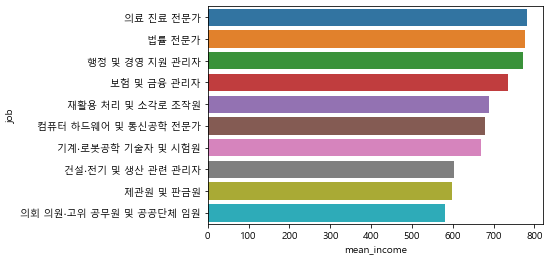

In [30]:
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

#막대 그래프 그리기
sns.barplot(data=top10, x='mean_income', y='job');